<a href="https://colab.research.google.com/github/taaha3244/joy-of-supML/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic


trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality
Value 2:  left ventricular hypertrophy

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart=pd.read_csv("D:\Exercises and Datasources\Datasets\heart_attack\heart.csv")

**Checking the shape of the dataset**

In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Looking for null values**

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No nulls Found ....

**Checking Data Types**

In [ ]:
heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

All attributes are int64 except 'oldpeak'

**Looking for duplicates**

In [ ]:
heart.duplicated().sum()

1

In [ ]:
#Dropping duplicate
heart.drop_duplicates(keep='first',inplace=True)

In [ ]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


**Checking new shape**

In [ ]:
heart.shape

(302, 14)

**Looking for statistical data

In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Data Visualization

**Univariate Analysis**

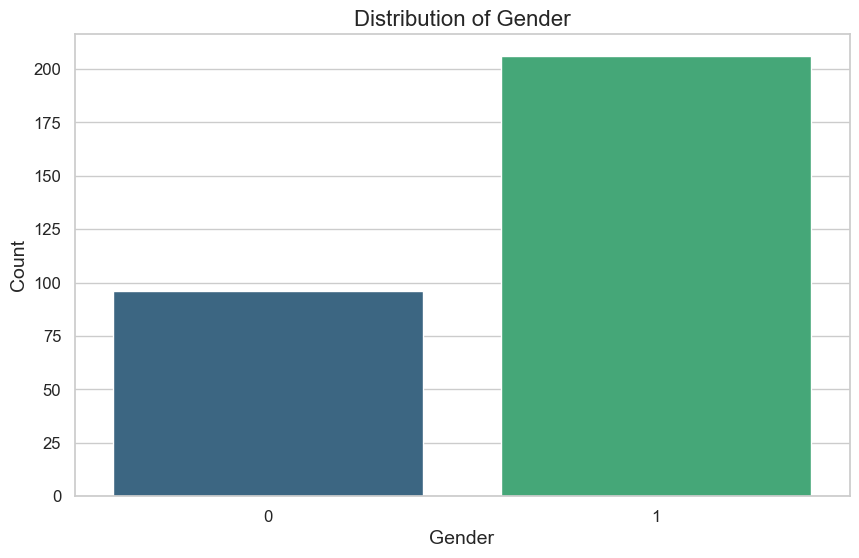

In [ ]:
#Distribution of age

# Set the style
sns.set(style="whitegrid")


%matplotlib inline

# Choose a color palette
palette = "viridis"  # You can choose any other Seaborn color palette

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=heart, palette=palette)

# Customize plot aesthetics
plt.title("Distribution of Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


In [ ]:
def count_plot_sns(x,xlabel,ylabel,title):
    sns.countplot(data=heart,x=x)
    # Customize plot aesthetics
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


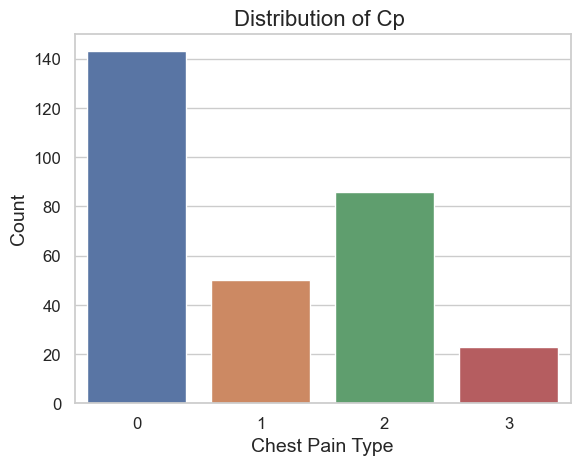

In [ ]:
count_plot_sns('cp','Chest Pain Type','Count','Distribution of Cp ')

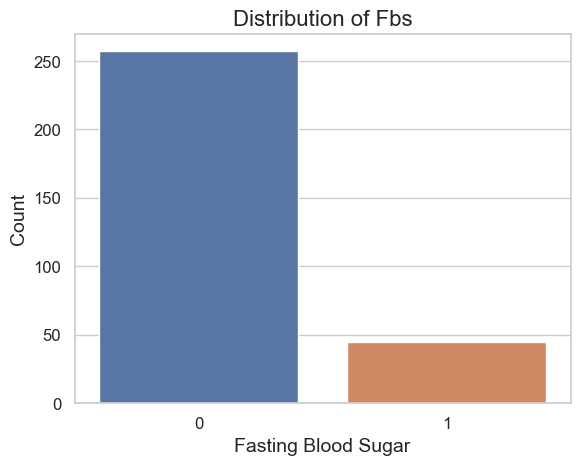

In [ ]:
count_plot_sns('fbs','Fasting Blood Sugar','Count','Distribution of Fbs')

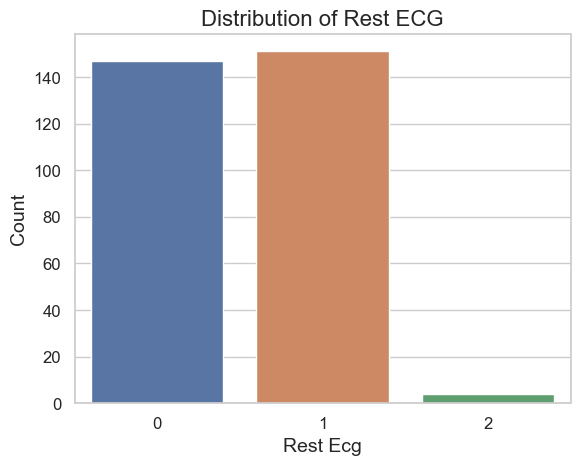

In [ ]:
count_plot_sns('restecg','Rest Ecg','Count','Distribution of Rest ECG')

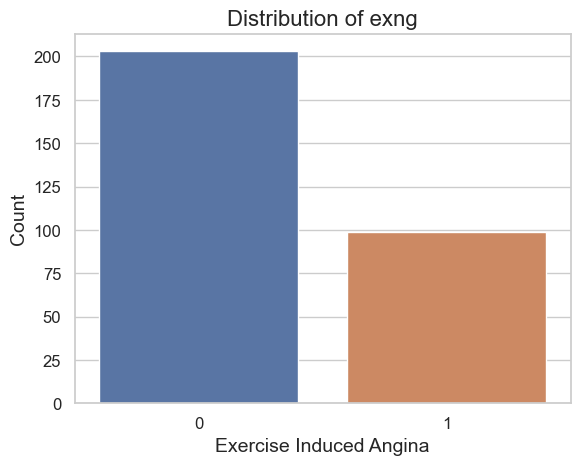

In [ ]:
count_plot_sns('exng','Exercise Induced Angina','Count','Distribution of exng')

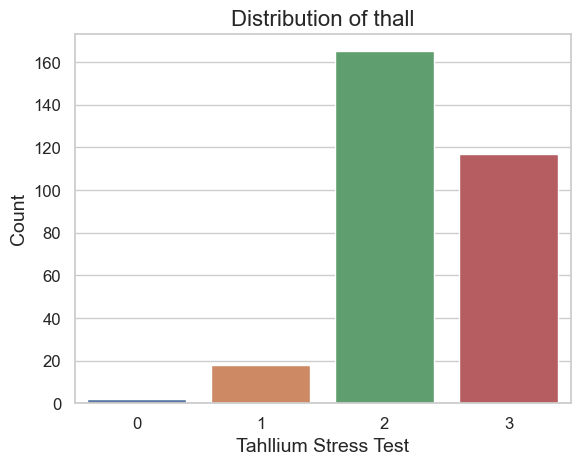

In [ ]:
count_plot_sns('thall','Tahllium Stress Test','Count','Distribution of thall')

In [ ]:
for column in heart.drop('output',axis=1):
    if heart[column].nunique()<=4:
        print("----------------------------------------------------")
        print(heart[column].value_counts())

----------------------------------------------------
sex
1    206
0     96
Name: count, dtype: int64
----------------------------------------------------
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
----------------------------------------------------
fbs
0    257
1     45
Name: count, dtype: int64
----------------------------------------------------
restecg
1    151
0    147
2      4
Name: count, dtype: int64
----------------------------------------------------
exng
0    203
1     99
Name: count, dtype: int64
----------------------------------------------------
slp
2    141
1    140
0     21
Name: count, dtype: int64
----------------------------------------------------
thall
2    165
3    117
1     18
0      2
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

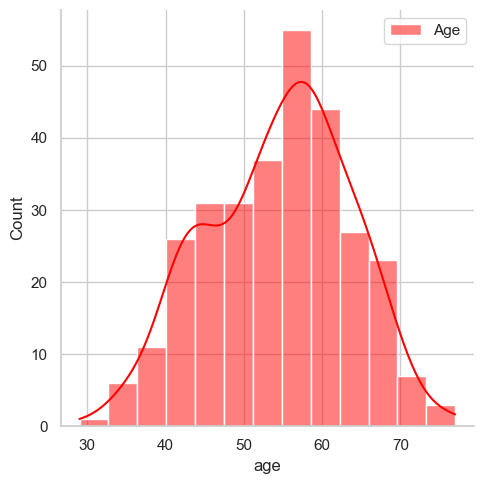

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="red", label="Age", kde= True)
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

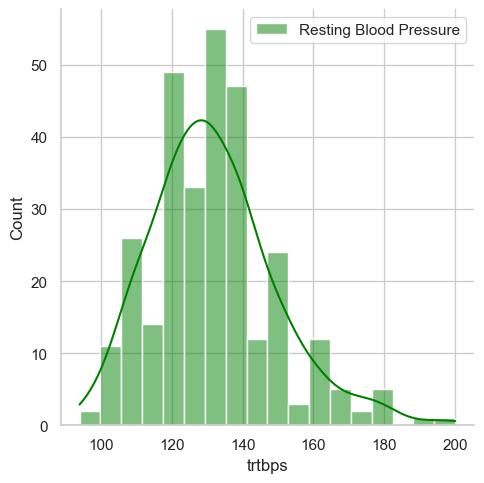

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

Trtbs has the highest count around 130

# Bi variate analysis

age vs Heart Attack

In [ ]:
# Age where there are less likelihood of hear attack
age_0=heart[heart['output']==0]['age']
#vice versa
age_1=heart[heart['output']==1]['age']

C:\Users\taaha\AppData\Local\Temp\ipykernel_25156\515394469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_0,kde=True,color='green')
C:\Users\taaha\AppData\Local\Temp\ipykernel_25156\515394469.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_1,kde=True,color='red')


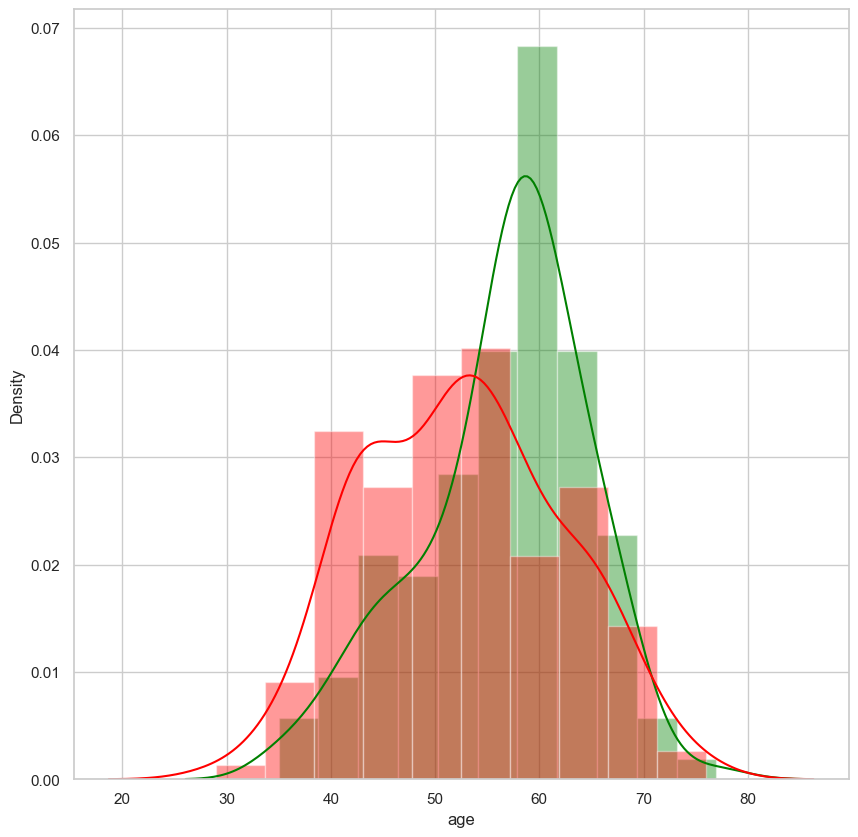

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(age_0,kde=True,color='green')
sns.distplot(age_1,kde=True,color='red')
plt.show()

The relationship of Cholestrol with output

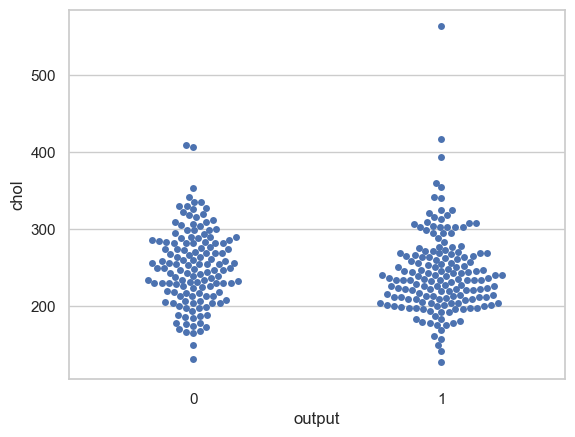

In [ ]:
sns.swarmplot(data=heart,x='output', y='chol')
plt.show()

# Age and Rest Blood pressure

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


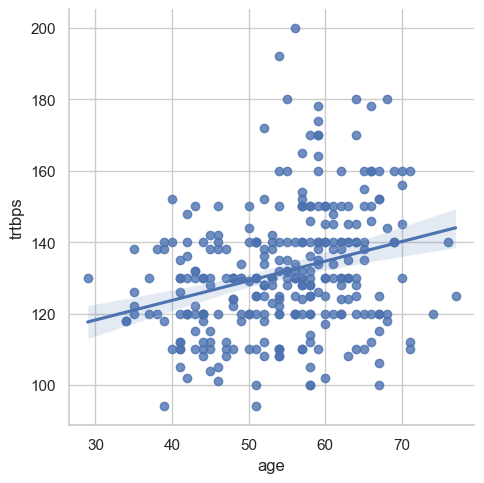

In [ ]:
sns.lmplot(x='age',y='trtbps',data=heart)
plt.show()

<Axes: >

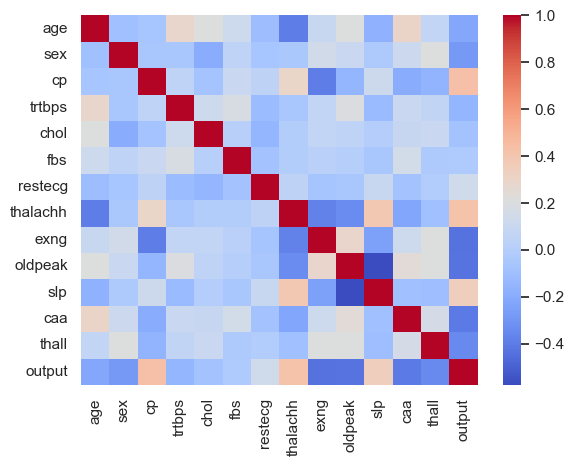

In [ ]:
corr=heart.corr()
sns.heatmap(corr, cmap="coolwarm")

# Data Preprocessing

**All the Features are numeric, so no need for One hot encoding**

Dividing data into Features and labels

In [ ]:
#features
X=heart.iloc[:,:-1].values
#labels
y=heart.iloc[:,-1].values

In [ ]:
#print shape of features and labels
print(f"X shape is:{X.shape}\ny shape is: {y.shape}")

X shape is:(302, 13)
y shape is: (302,)


**Splitting data into Training and test set**

Stratified split ensures that each subset of the data (train and test sets) maintains the same proportion of classes as the original dataset, preventing an imbalance in the distribution of classes between training and testing.
**Stratify=y ensures stratified sampling**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

Shapes of the Dataset after split

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


# Scaling the features

**Why scale??**

Features with larger scales can dominate the learning process, leading the algorithm to give more importance to those features. This can result in a model that is biased toward certain features and may not generalize well to new data.

**Is scaling required in Decision Trees?**

Decision trees do not rely on distance calculations between data points. Unlike algorithms such as k-nearest neighbors or support vector machines, where distances play a crucial role, decision trees are not influenced by the scale of the features.

Instantiating a Decision Tree Model Without Scaling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

In [ ]:
y_preds=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

con=confusion_matrix(y_test,y_preds)

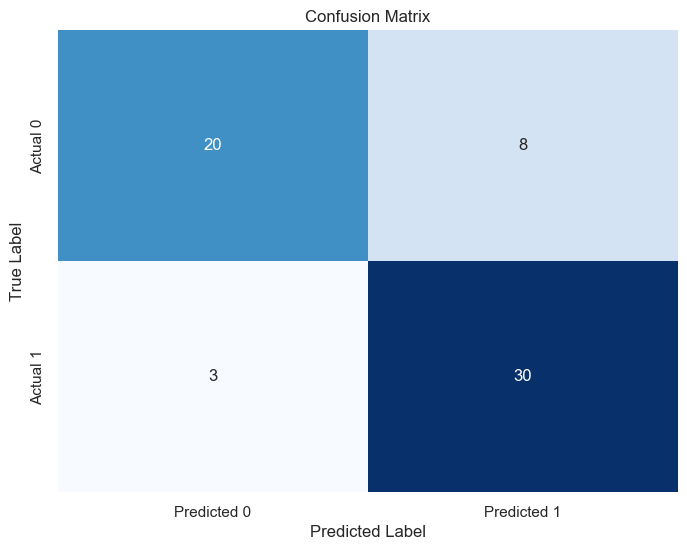

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc=accuracy_score(y_test,y_preds)
f1=f1_score(y_test,y_preds)
pre=precision_score(y_test,y_preds)
rec=recall_score(y_test,y_preds)
print(f" Accuracy :{acc*100:.2f}%, Precision: {pre*100:.2f}%, Recall : {rec*100:.2f}%, f1Score : {f1*100:.2f}%")

 Accuracy :81.97%, Precision: 78.95%, Recall : 90.91%, f1Score : 84.51%


**Evaluating model on Train data to see Overfitting**

In [ ]:
tr_preds=clf.predict(X_train)

In [ ]:
acc=accuracy_score(y_train,tr_preds)
f1=f1_score(y_train,tr_preds)
pre=precision_score(y_train,tr_preds)
rec=recall_score(y_train,tr_preds)
print(f" Accuracy :{acc*100:.2f}%, Precision: {pre*100:.2f}%, Recall : {rec*100:.2f}%, f1Score : {f1*100:.2f}%")

 Accuracy :100.00%, Precision: 100.00%, Recall : 100.00%, f1Score : 100.00%


**The Problem of Overfitting**
The result of Model on train data shows it has learnt the train data and Generalizing on Test data. The model is Overfitting. We have some techniques to solve this

# Cross Validation

Cross-validation acts as a robust evaluation technique in machine learning, systematically partitioning the dataset into multiple folds for training and testing. This mitigates overfitting concerns and provides a more reliable estimate of a model's generalization performance. It is essential for hyperparameter tuning, model selection, and understanding how well the model adapts to diverse data subsets, enhancing overall performance assessment and stability.

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=7, shuffle=True,random_state=42)
clf=DecisionTreeClassifier()
cv_results=cross_val_score(clf,X,y,cv=kf)

In [ ]:
print(cv_results)

[0.75       0.79069767 0.76744186 0.79069767 0.74418605 0.81395349
 0.74418605]


In [ ]:
np.mean(cv_results)

0.7715946843853819

In [ ]:
np.std(cv_results)

0.025383233870325782

In [ ]:
np.quantile(cv_results,[0.025,0.975])

array([0.74418605, 0.81046512])

The mean , std and 5 ,95 % quantile of th model seem in Harmony

# Decision Tree Classifier Parameters


**criterion:**
The function to measure the quality of a split. For classification, "gini" (Gini impurity) or "entropy" (information gain) can be used.
Default: "gini"

**splitter:**
The strategy used to choose the split at each node. Options are "best" (chooses the best split) or "random" (chooses the best random split).
Default: "best"

**max_depth:**
The maximum depth of the tree. Limits the maximum depth of the tree to prevent overfitting.
Default: None (unlimited depth)

**min_samples_split:**
The minimum number of samples required to split an internal node. If a node has fewer samples than this, it will not be split.
Default: 2

**min_samples_leaf:**
The minimum number of samples required to be at a leaf node. A smaller value may lead to a more complex model, while a larger value may smooth the model.
Default: 1

**min_weight_fraction_leaf:**
Similar to min_samples_leaf but expressed as a fraction of the total sum of weights.
Default: 0.0

**max_features:**
Definition: The maximum number of features considered for splitting a node. It helps prevent overfitting.
Default: None (consider all features)

**max_leaf_nodes:**
Definition: The maximum number of leaf nodes. Limits the growth of the tree.
Default: None

**min_impurity_decrease:**
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
Default: 0.0


**Hyper Parameter Tuning**

Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
kf=KFold(n_splits=5, shuffle=True,random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
}
clf=DecisionTreeClassifier()
tree_cv=GridSearchCV(clf,param_grid,cv=kf)
tree_cv.fit(X_train,y_train)
print(tree_cv.best_params_,tree_cv.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'} 0.8298469387755102


Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
kf=KFold(n_splits=5, shuffle=True,random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
}
clf=DecisionTreeClassifier()
rand_tree_cv=RandomizedSearchCV(clf,param_grid,cv=kf)
rand_tree_cv.fit(X_train,y_train)
print(rand_tree_cv.best_params_,rand_tree_cv.best_score_)

{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': None, 'criterion': 'gini'} 0.8131802721088436


**Why use Randomized Search CV?**


Randomized Search is more computationally efficient than Grid Search, especially for large hyperparameter spaces.
Exploration of Hyperparameter Space:

It provides a thorough exploration of the hyperparameter space by randomly sampling combinations, potentially discovering optimal values.
Better Performance with Limited Resources:

Well-suited for situations with limited computational resources, achieving good results with fewer iterations.

**Evaluating on Test Data Set**

In [ ]:
test_score=rand_tree_cv.score(X_test,y_test)
test_score*100

78.68852459016394

So, now data accuracy on Train data is 81% and on test data is 78%. The problem of overfitting has been solved. The model has not learnt the Train data but has some Logic now